# This notebook is dedicated to EDA

Importing useful libraries and main data

In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

data = pd.read_csv("cleaned_data.csv")

## 1. things to note:
1. we want to use Platform, Genre, critic_score, User_score, NA_Sales, PAL_Sales, JP_Sales and Other_Sales to predict Global_Sales
2. there are many Null data points. what are we going to do about those?

#vg_critic score and vg_user_score has a lot of null values. vg_critic score has around 60% of Null Values . Therefore it could be possibel to use Missing forest to fill the null values. As for vg_user_score we have decided to drop the entire column as there are too many null values.

In [16]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7936 entries, 0 to 7935
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        7936 non-null   int64  
 1   Name              7936 non-null   object 
 2   Platform          7936 non-null   object 
 3   Year              7936 non-null   int64  
 4   Genre             7936 non-null   object 
 5   Publisher         7936 non-null   object 
 6   Developer         7936 non-null   object 
 7   vg_Rank           7936 non-null   float64
 8   vg_critic_score   3202 non-null   float64
 9   vg_user_score     223 non-null    float64
 10  meta_score        7936 non-null   float64
 11  meta_UserReview   7936 non-null   float64
 12  NA_Sales          7936 non-null   float64
 13  PAL_Sales         7936 non-null   float64
 14  JP_Sales          7936 non-null   float64
 15  Other_Sales       7936 non-null   float64
 16  Global_Sales      7936 non-null   float64


## 2. things to compare:
1. genre vs global sales
2. platform vs global sales (we will remove the platforms that are small, so that we can focus on the bigger picture)
3. correlation between regional sales vs platform (is there a region that likes a particular platform?)
4. correlation between regional sales vs genre (is there a region that likes a particular genre?)
5. correlation between regional sales vs global sales

<AxesSubplot:xlabel='Global_Sales', ylabel='Genre'>

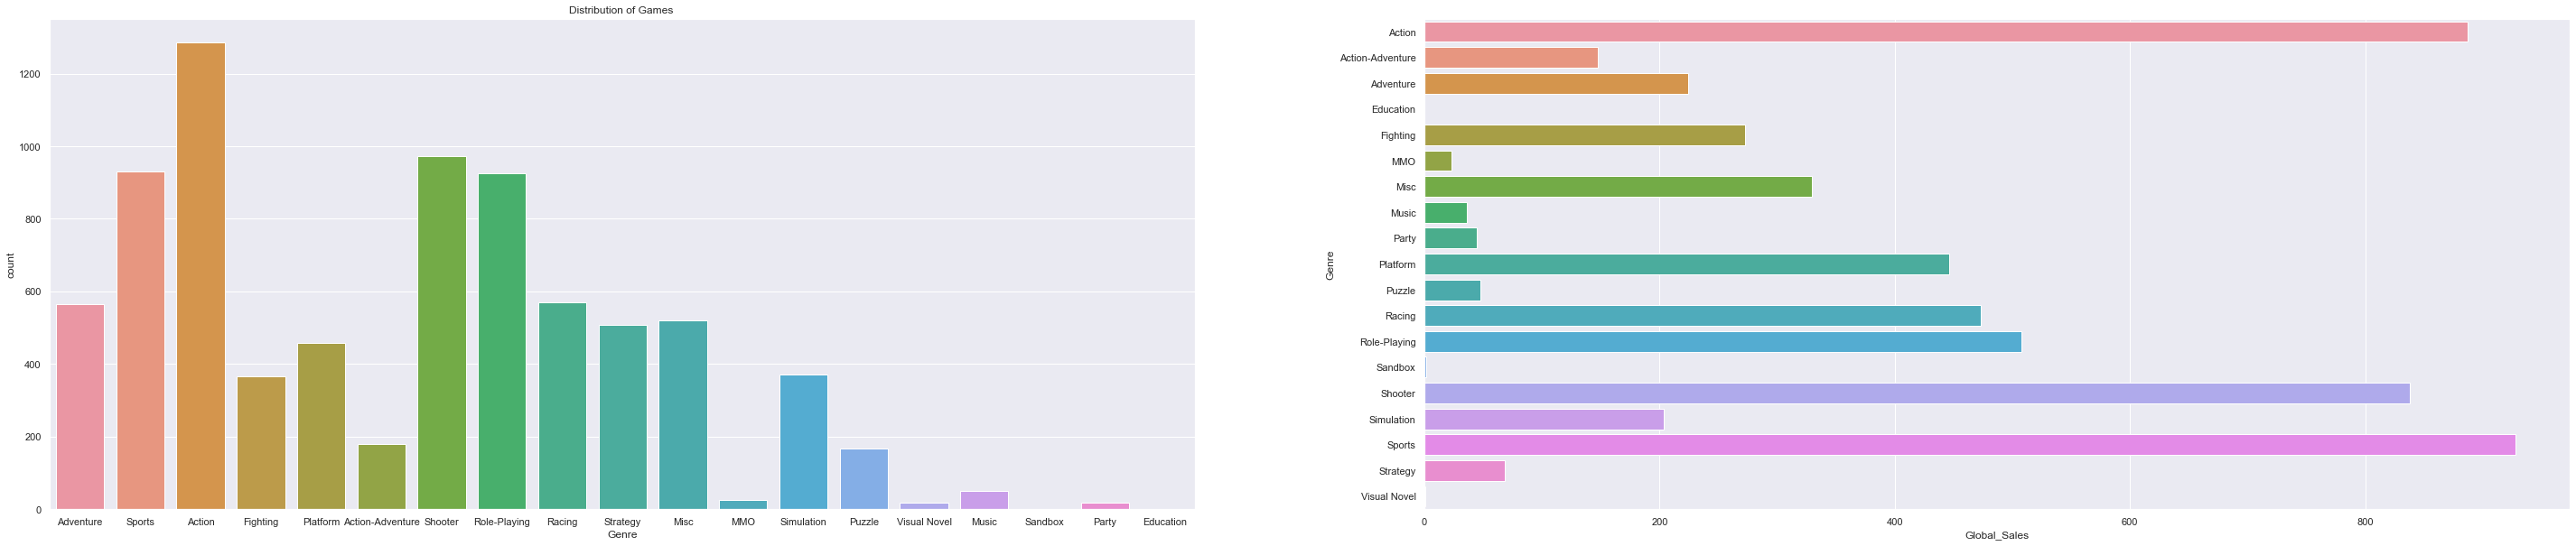

In [32]:
#genre vs global sales
f,axes = plt.subplots(1,2,figsize=(50,10))
axes[0].set_title("Distribution of Genre ")
sb.countplot(x="Genre", data = data , ax = axes[0])

genereSale = data.groupby('Genre')['Global_Sales'].sum()
sb.barplot(y=genereSale.index, x=genereSale,ax=axes[1])


<AxesSubplot:title={'center':'Distributon of Global Sales with respect to platform'}, xlabel='Global_Sales', ylabel='Platform'>

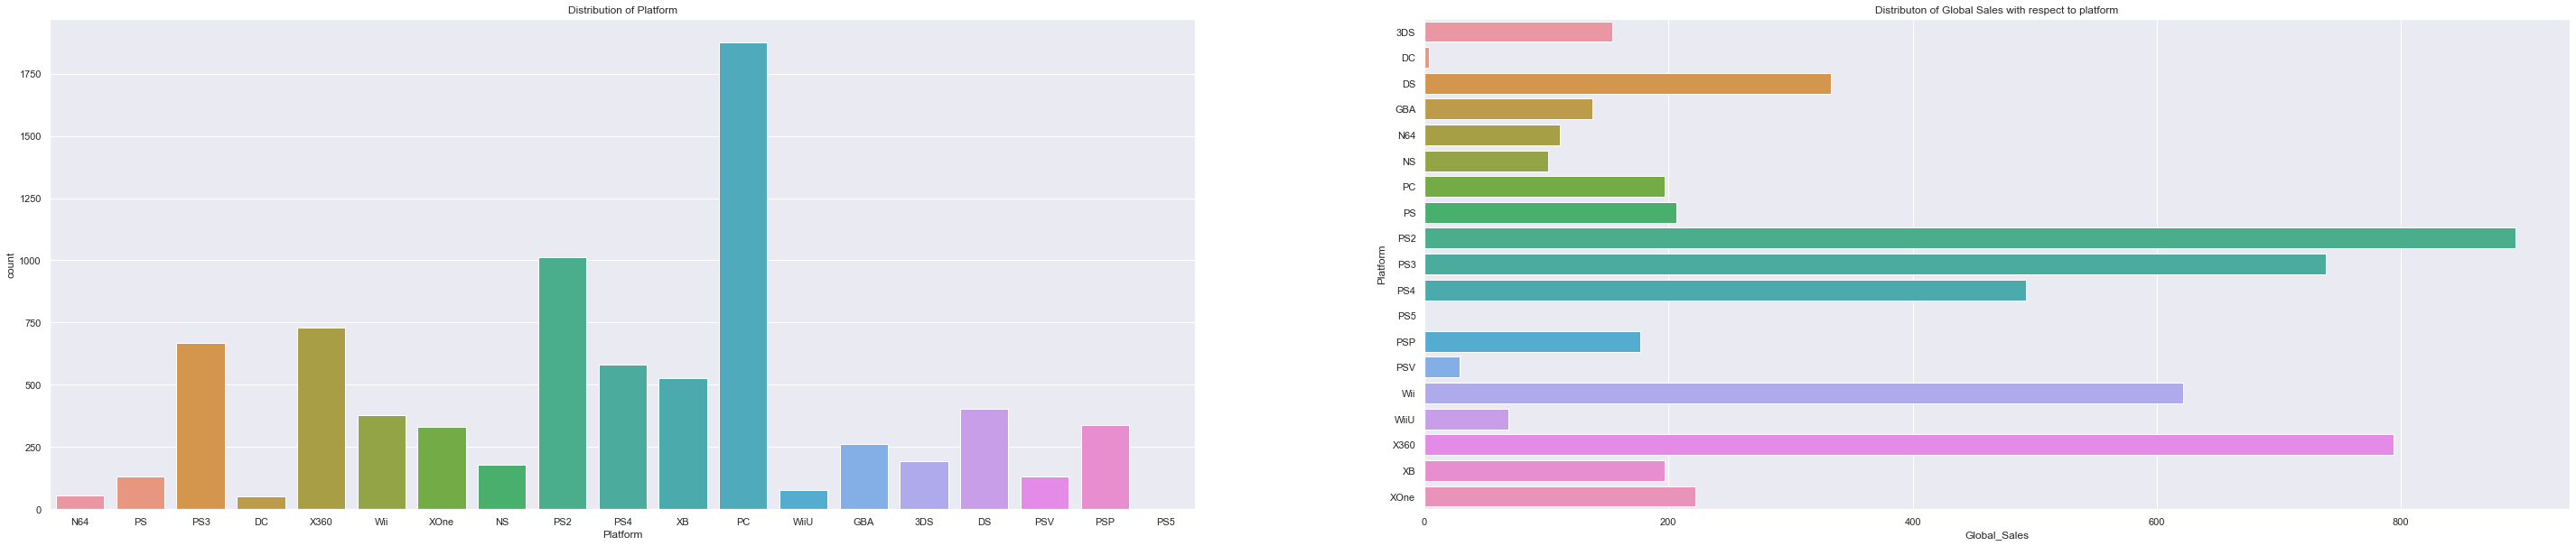

In [33]:
#platform vs global sales
f,axes = plt.subplots(1,2,figsize=(50,10))
axes[0].set_title("Distribution of Platform")
sb.countplot(x="Platform", data = data , ax = axes[0])

platformSale = data.groupby('Platform')['Global_Sales'].sum()
axes[1].set_title("Distributon of Global Sales with respect to platform")
sb.barplot(y=platformSale.index, x=platformSale,ax=axes[1])

In [13]:
#correlation between regional sales and platform

PC      1877
PS2     1011
X360     729
PS3      670
PS4      582
XB       526
DS       402
Wii      379
PSP      339
XOne     330
GBA      263
3DS      194
NS       179
PSV      132
PS       132
WiiU      79
N64       57
DC        53
PS5        2
Name: Platform, dtype: int64

In [49]:
#Identifying top games per year based on the different predictors

top_game = data.groupby('Year')['Global_Sales']
top_game.head()


0        7.60
1        4.68
2       10.57
3        0.34
4       11.09
        ...  
3728     0.00
4001     0.00
5352     0.00
6548     0.03
7412     0.01
Name: Global_Sales, Length: 139, dtype: float64

## 3. main issues
1. we realised that we don't have a lot of indicators to work with, so we merged another dataset and cleaned it (can add in the cleaning code here a bit ah). this gives us more indicators to work with.

## 4. more things to compare:
1. correlation between meta score and all sales (regional + global) -> is meta score a good indicator of sales in general?
2. correlation between user review and all sales (regional + global) -> is user review a good indicator of sales in general?

## 5. end of EDA
- we decide on what indicators we are using, based on the results that we get from the EDA